# 1. General Salary Data:


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [31]:
salary_data = pd.read_csv("https://richardson.byu.edu/220/ds_salary.csv")

In [32]:
salary_data.head()

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


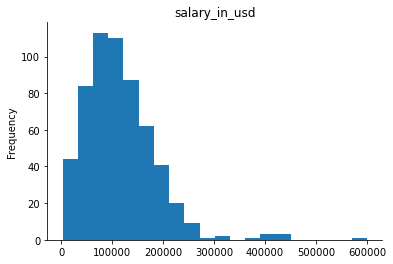

In [33]:
from matplotlib import pyplot as plt
salary_data['salary_in_usd'].plot(kind='hist', bins=20, title='salary_in_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

# 2. Effect of Experience on Salary:

## Responses by Experience:

The following plot shows the number of responses by experience level. The experience levels are divided into 4 categories: 
- ***EN***rty level
- ***MI***d level
- ***SE***nior level
- ***EX***ecutive level

There are not as many Executives, which is expected. The majority of the responses are from Senior and Mid level professionals.

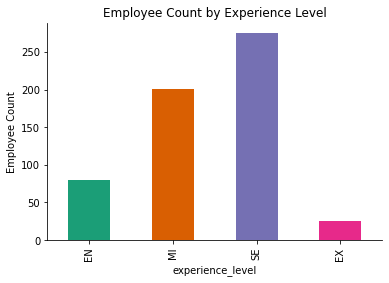

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.ylabel('Employee Count')
plt.title('Employee Count by Experience Level')
plt.gca().spines[['top', 'right',]].set_visible(False)

experience_order = ['EN', 'MI', 'SE', 'EX']
salary_data.groupby('experience_level').size().loc[experience_order].plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

plt.show()


## Salary by Experience:

The following plot shows a box plot for each experience level. The average salary increases with experience level, which is expected.

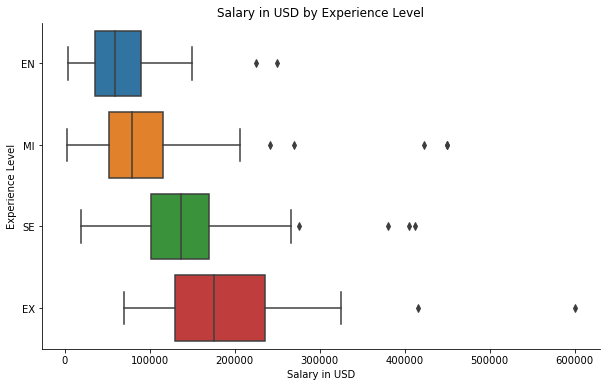

In [35]:
plt.figure(figsize=(10, 6))
experience_order = ['EN', 'MI', 'SE', 'EX']
sns.boxplot(x='salary_in_usd', y='experience_level', data=salary_data, order=experience_order)

plt.title('Salary in USD by Experience Level')
plt.xlabel('Salary in USD')
plt.ylabel('Experience Level')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

Curiously the standard deviation of salaries is greater for the MI and EX levels. This could reflect the fact that not all experience is created equally. Additionally, Senior level professionals may have more similar salaries due to the fact that they are at the limit of their career progression.

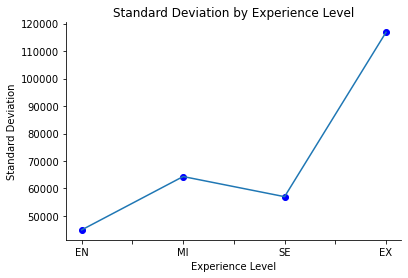

In [36]:
std_by_experience = salary_data.groupby('experience_level')['salary_in_usd'].std().loc[experience_order]

std_by_experience.plot(kind='line', title='Standard Deviation by Experience Level')
plt.scatter(std_by_experience.index, std_by_experience.values, color='Blue', label='Std Deviation')
plt.xlabel('Experience Level')
plt.ylabel('Standard Deviation')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# 3. Impact of Company Size on Salary:

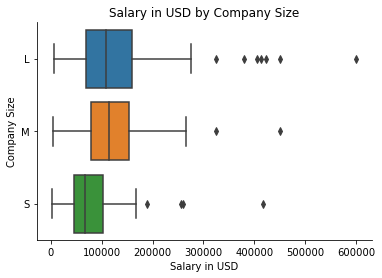

In [37]:
sns.boxplot(x='salary_in_usd', y='company_size', data=salary_data, order="L" "M" "S")

plt.title('Salary in USD by Company Size')
plt.xlabel('Salary in USD')
plt.ylabel('Company Size')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [38]:
salary_data.groupby('company_size')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,182.0,126090.016484,86348.230843,5882.0,69999.25,109500.0,160000.0,600000.0
M,321.0,118350.323988,58590.477351,4000.0,78526.00,115000.0,154000.0,450000.0
S,78.0,79817.833333,64581.554758,2859.0,45653.50,67881.5,102370.0,416000.0


# 4. Job Title Analysis:

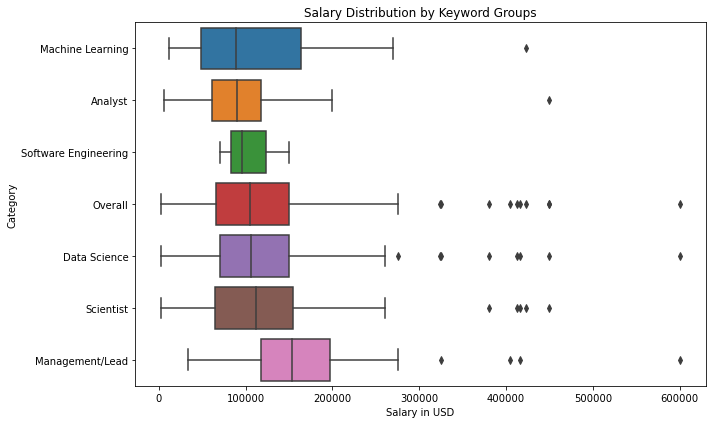

In [39]:
def analyze_by_keywords(salary_data, key_words_list: dict):
    results = {}
    for title, key_words in key_words_list.items():
        key_words = [key_word.lower() for key_word in key_words]
        if len(key_words) == 0:
            filtered_data = salary_data
        else:
            filtered_data = salary_data[salary_data['job_title'].str.lower().str.contains('|'.join(key_words))]
        results[title] = filtered_data['salary_in_usd']

    sorted_results = {key: value for key, value in sorted(results.items(), key=lambda item: item[1].median())}
    
    plot_data = pd.DataFrame([(key, value) for key, values in sorted_results.items() for value in values], columns=['Category', 'Salary'])
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Salary', y='Category', data=plot_data, orient='h')
    
    plt.xlabel("Salary in USD")
    plt.title("Salary Distribution by Keyword Groups")
    
    plt.tight_layout()
    plt.show()
    
    return results

key_words_list = {
    "Machine Learning": ["machine learning", "ml", "nlp", "ai "],
    "Data Science": ["data science", "data scientist", "data analyst", "data engineer"],
    "Software Engineering": ["software engineer", "software developer"],
    "Analyst": ["analyst"],
    "Management/Lead": ["manager", "director", "executive", "head", "lead", "principal"],
    "Scientist": ["scientist"],
    "Overall": []
}

results = analyze_by_keywords(salary_data, key_words_list)
# for title, salaries in results.items():
#     print(f"{title}:\n{salaries.describe()}")

# job_titles = set(str(job_title).lower() for job_title in salary_data['job_title'])
# print(job_titles)

# 5. Interactions Between Relationships:

# 6. Conclusion:

In terms of the relationship between company size and the salary of data scientists, we found that small companies pay significantly less overall than medium and large companies, with an average salary around 65k-80k a year compared to the average of medium and large companies being around 115k and 110k-125k respectively. Medium and large sized companies follow a similar trend overall, but they differ significantly on the higher end of salaries, where large companies surveyed had their highest salary at 600k a year compared to 450k for medium companies.

### Job Title Analysis Results

Interestingly enough, Machine Learning related job titles have the lowest median salary compared to the other categories (including the entire dataset) coming in at around $88k a year. Not surprisingly, though, job titles that refer to some sort of management or lead role had a much higher median pay at $153k with the highest overall paying job at 600k a year.